# Plant Disease Image Recognition Anaylsis

# Imports

In [2]:
import os

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image, ImageFile

# Constants

In [4]:
PATH = "/Users/maukanmir/Downloads/archive/"
train_path, test_path, val_path = PATH + "Train/", PATH + "Test/", PATH +"Validation/"
INPUT_SHAPE = (224,224, 3)
BATCH_SIZE = 32

# Functions

In [12]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

def load_process_images(img_path, target_size=INPUT_SHAPE):
  try:
    with Image.open(img_path) as img:
      img = img.resize(target_size[:2])
      img = img.convert("RGB")
      
      img_arr = np.array(img)/255.0
      img_arr = img_arr.astype(np.float32)
      return img_arr
  except IOError as e:
    print(f"The following image failed to process {e}")
    return None

def grab_images(path):
  
  X, y = [], []
  
  for root, dirs, files in os.walk(path):
    for file in files:
      if file.lower().endswith((".png", ".jpeg", ".jpg")):
        path = os.path.join(root, file)
        img = load_process_images(path)
        if img is not None:
          X.append(img)
          label = root.split(os.sep)[-1]
          y.append(label)
  
  X, y = np.array(X), np.array(y)
  return X, y

def check_class_imbalances(target):
  unique, counts = np.unique(target, return_counts=True)
  
  plt.figure(figsize=(10, 6))
  plt.pie(counts,labels=unique, autopct="%1.1f%%", startangle=140)
  plt.title("Target Class Imbalance")
  plt.show()
  
  plt.figure(figsize=(10, 6))
  sns.countplot(x=target)
  plt.title("Target Class Imbalance")
  plt.xlabel("Classes")
  plt.ylabel("Counts")
  plt.xticks(rotation=45)
  plt.show()

# Load Data

In [9]:
X_train, y_train = grab_images(train_path)
X_val, y_val = grab_images(val_path)
X_test, y_test = grab_images(test_path)

# Dataset shape

In [10]:
print(f"X Train Shape:{X_train.shape}, y Train Shape:{y_train.shape}")
print(f"X Test Shape:{X_test.shape}, y Test Shape:{y_test.shape}")
print(f"X Val Shape:{X_val.shape}, y Val Shape:{y_val.shape}")

X Train Shape:(1322, 224, 224, 3), y Train Shape:(1322,)
X Test Shape:(150, 224, 224, 3), y Test Shape:(150,)
X Val Shape:(60, 224, 224, 3), y Val Shape:(60,)


# Check Class Imabalance

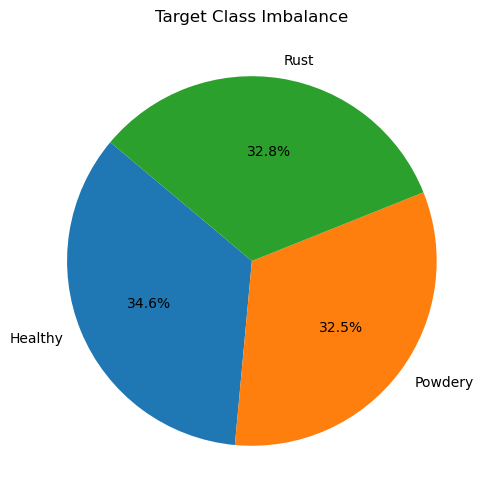

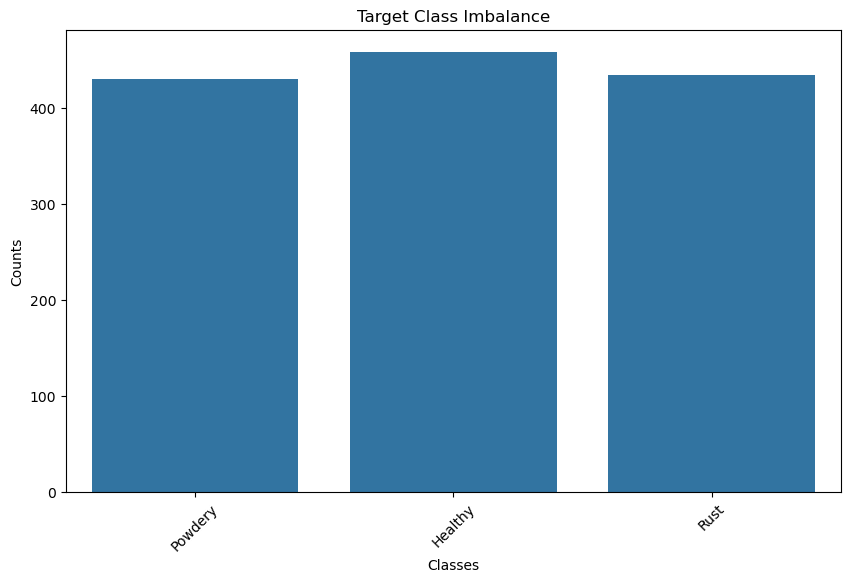

In [14]:
check_class_imbalances(y_train)

# Fairly Balanced Dataset

# Let's take a look at our images